# Understanding the n_jobs Parameter to Speedup Scikit-learn Classification

In this notebook I illustrate the importance of the `n_jobs` parameter provided by some classes of the scikit-learn library. According to the official scikit-learn library, the `n_jobs` parameter is described as follows:

The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

This means that the `n_jobs` parameter can be used to distribute and exploit all the CPUs available in the local computer.

In this tutorial, I evaluate the time elapsed to fit all the default classification datasets provided by the scikit-learn library, by varying the `n_jobs` parameter from 1 to the maximum number of CPUs. As example, I will try a K-Neighbors Classifier with Grid Search with Cross Validation.

## Define auxiliary variables

Firstly I define a list of all the classification datasets names, contained in the [sklearn.datasets package](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [95]:
datasets_list = ['iris', 'digits', 'wine', 'breast_cancer','diabetes']

Then, I calculate the number of CPUs available in my system. I exploit the `cpu_count()` function provided by the `os` package.

In [96]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 4


I also define all the parameters for the Grid Search.

In [97]:
import numpy as np
parameters = {  'n_neighbors'   : np.arange(2, 25),
                'weights'       : ['uniform', 'distance'],
                'metric'        : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                'algorithm'     : ['ball_tree', 'kd_tree']
            }

## Define the Main function

Now, I'm ready to define the main function, which will be used to test the time elapsed for training. I import all the needed functions and classes:

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
import time

and I define the `load_and_train()` function, which receives the dataset name as input. In order to load the corresponding dataaset, I exploit the `globals()` function, which contains a table with all the imported functions. Since I have already imported all the datasets provided by scikit-learn, I can pass the function name to the `globals()` function. The syntax is: `globals()[<function_name>]()`.

Once loaded the dataset, I can build a loop which iterates across the number of CPUS and calculates the time elapsed for training, by varying the number of CPUs. I build a list with all the elapsed times, which are eventually returned by the function.

In [99]:
def load_and_train(name):
    dataset = globals()['load_' + name]()
    X = dataset.data
    y = dataset.target
    tdelta_list = []
    for i in range(1, n_cpu+1):
        s = time.time()
        model = KNeighborsClassifier(n_jobs=i)
        clf = GridSearchCV(model, parameters, cv = 10)
        model.fit(X_train, y_train)
        e = time.time()
        tdelta = e - s 
        tdelta_list.append({'time' : tdelta, 'bin' : i})
    return tdelta_list

## Plot Results
Finally I invoke the `load_and_train()` function for all the datasets names and I plot results.

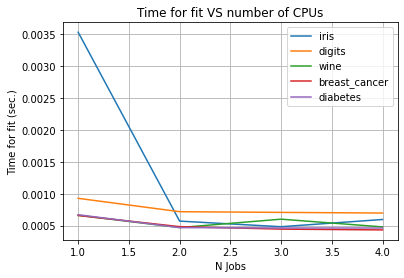

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

for d in datasets_list:
    tdelta_list = load_and_train(d)
    df = pd.DataFrame(tdelta_list)
    plt.plot(df['bin'], df['time'], label=d)
plt.grid()
plt.legend()
plt.xlabel('N Jobs')
plt.ylabel('Time for fit (sec.)')
plt.title('Time for fit VS number of CPUs')
plt.show()